# Online Shop Customer Sales Data

Online shops typically have a variety of features to make the shopping experience easy and intuitive for customers. These may include product search functions, product recommendations, customer reviews, and a streamlined checkout process. Many online shops also offer various payment options, such as credit cards, PayPal, or other electronic payment methods.

Overall, online shops have transformed the way people shop and have made it easier than ever for businesses to reach a global audience

Data analysis on tons of listings is a crucial factor for the online sector. These listing generate a lot of data
which can be analysed and used for understanding of customers behaviour and performance of the online mode/sector, implementation of innovative additional services and much more.

This dataset has around 65,700+ observations in it with 12 columns and it is a mix between object and numeric values.

#### Variable description
- Customer_id = unique customer id
- Age = customer's age
- Gender = 0: Male, 1: Female
- Revenue_Total = total sales by customer
- N_Purchases = number of purchases to date
- Purchase_DATE = date latest purchase, dd.mm.yy
- Purchase_VALUE = latest purchase in €
- Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other
- Time_Spent = time spent (in sec) on website
- Browser = 0: Chrome, 1: Safari, 2: Edge, 3: Other
- Newsletter = 0: not subscribed, 1: subscribed
- Voucher = 0: not used, 1: used


##### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
import plotly.express as px
import pyodbc
from sqlalchemy import create_engine
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

##### Reading Data

In [2]:
data = pd.read_csv('Online_Shop.csv')
data

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


##### Data Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


##### Checking the data type of columns

In [4]:
data.dtypes

Customer_id         int64
Age                 int64
Gender              int64
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method          int64
Time_Spent          int64
Browser             int64
Newsletter          int64
Voucher             int64
dtype: object

##### Checking null/nan values in the data set

In [5]:
data.isnull().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

##### Checking the duplicate values in the data set

In [6]:
data.duplicated().sum()

0

### Transforming the data 
The data set is difficult in terms of understanting 
- Transforming the data values in the set as per the information 
- Extracting Days and Months from data set for futher analysis 

In [7]:
gen = data['Gender'].astype(int)
gender = ['Male' if i==0 else 'Female' for i in gen]
data['Gender'] = gender

In [8]:
brow = data['Browser']
browser = ['Chrome' if i==0 else 'Safari' if i==1 else 'Edge' if i==2 else 'Other' for i in brow]
data['Browser'] = browser

In [9]:
news = data['Newsletter']
newsletter = ['Not Subscribed' if i==0 else 'Subscribed' for i in news]
data['Newsletter'] = newsletter

In [10]:
v = data['Voucher']
voucher = ['Not Used' if i==0 else 'Used' for i in v]
data['Voucher'] = voucher

In [11]:
pay = data['Pay_Method']
payment = ['Digital Wallets' if i==0 else 'Card' if i==1 else 'PayPal' if i==2 else 'Other' for i in pay]
data['Pay_Method'] = payment

In [12]:
data['Month'] = data['Purchase_DATE'].str.split('.').str[1].astype(int)
data['Year'] = data['Purchase_DATE'].str.split('.').str[2].astype(int)

##### Droping Date Column

In [13]:
data.drop('Purchase_DATE', axis = 1, inplace = True)

##### Information on int variables 

In [14]:
data.describe()

,Customer_id,Age,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent,Month,Year
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,27.732935,3.992477,15.968699,598.925603,6.531415,21.002690
std,18993.813493,13.825466,14.941878,2.004370,13.229295,277.833635,3.459452,0.051797
min,504308.000000,16.000000,0.500000,1.000000,0.005000,120.000000,1.000000,21.000000
25%,520756.750000,28.000000,15.300000,2.000000,4.819750,358.000000,4.000000,21.000000
50%,537205.500000,40.000000,30.100000,4.000000,12.640000,598.000000,7.000000,21.000000
75%,553654.250000,51.000000,37.600000,6.000000,24.752000,840.000000,10.000000,21.000000
max,570103.000000,63.000000,59.900000,7.000000,59.900000,1080.000000,12.000000,22.000000


##### Information on object variables 

In [15]:
data.describe(include = 'object')

,Gender,Pay_Method,Browser,Newsletter,Voucher
count,65796,65796,65796,65796,65796
unique,2,4,4,2,2
top,Female,Card,Chrome,Not Subscribed,Not Used
freq,44172,19754,42076,55859,49330


##### Checking Transformed Data Information 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  object 
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_VALUE  65796 non-null  float64
 6   Pay_Method      65796 non-null  object 
 7   Time_Spent      65796 non-null  int64  
 8   Browser         65796 non-null  object 
 9   Newsletter      65796 non-null  object 
 10  Voucher         65796 non-null  object 
 11  Month           65796 non-null  int32  
 12  Year            65796 non-null  int32  
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 6.0+ MB


In [17]:
data.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,504308,53,Male,45.3,2,24.915,Card,885,Chrome,Not Subscribed,Not Used,6,21
1,504309,18,Female,36.2,3,2.896,PayPal,656,Chrome,Not Subscribed,Used,12,21
2,504310,52,Female,10.6,1,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used,3,21
3,504311,29,Male,54.1,5,43.280,Card,906,Chrome,Subscribed,Not Used,10,21
4,504312,21,Female,56.9,1,56.900,Card,605,Chrome,Subscribed,Not Used,9,21


##### Connecting to SQL

In [18]:
try:
    mydb = pyodbc.connect('DRIVER={SQL Server};'
                      'Server=SHIV;'
                      'Databse=joins'
                      'User ID=sa;'
                      'Password=Tiger;')
    cursor = mydb.cursor()
    print("SQL Connected")
except Exception as e:
    mydb.close()
    print(str(e))

SQL Connected


##### Creating cursor and importing the data set to sql 

In [19]:
cursor = create_engine('sqlite://', echo = False)
data.to_sql('online_shop', con=cursor)

65796

##### Reading SQL data 

In [20]:
df = pd.read_sql('online_shop', con=cursor)
df

,index,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,0,504308,53,Male,45.3,2,24.915,Card,885,Chrome,Not Subscribed,Not Used,6,21
1,1,504309,18,Female,36.2,3,2.896,PayPal,656,Chrome,Not Subscribed,Used,12,21
2,2,504310,52,Female,10.6,1,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used,3,21
3,3,504311,29,Male,54.1,5,43.280,Card,906,Chrome,Subscribed,Not Used,10,21
4,4,504312,21,Female,56.9,1,56.900,Card,605,Chrome,Subscribed,Not Used,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65791,65791,570099,30,Female,10.9,4,6.213,Card,894,Chrome,Not Subscribed,Not Used,2,21
65792,65792,570100,33,Male,29.3,1,29.300,Digital Wallets,722,Chrome,Not Subscribed,Not Used,2,21
65793,65793,570101,50,Male,25.4,5,23.114,Other,424,Chrome,Not Subscribed,Not Used,10,21
65794,65794,570102,56,Male,29.2,1,29.200,Other,731,Chrome,Not Subscribed,Not Used,12,21


##### Droping the index column 

In [21]:
df.drop('index', axis = 1, inplace = True)
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,504308,53,Male,45.3,2,24.915,Card,885,Chrome,Not Subscribed,Not Used,6,21
1,504309,18,Female,36.2,3,2.896,PayPal,656,Chrome,Not Subscribed,Used,12,21
2,504310,52,Female,10.6,1,10.600,Digital Wallets,761,Chrome,Subscribed,Not Used,3,21
3,504311,29,Male,54.1,5,43.280,Card,906,Chrome,Subscribed,Not Used,10,21
4,504312,21,Female,56.9,1,56.900,Card,605,Chrome,Subscribed,Not Used,9,21


##### Fetching data using SQL queries

In [22]:
Query = '''select * from online_shop limit 5'''
query = cursor.execute(Query).fetchall()
print(query)

[(0, 504308, 53, 'Male', 45.3, 2, 24.915, 'Card', 885, 'Chrome', 'Not Subscribed', 'Not Used', 6, 21), (1, 504309, 18, 'Female', 36.2, 3, 2.896, 'PayPal', 656, 'Chrome', 'Not Subscribed', 'Used', 12, 21), (2, 504310, 52, 'Female', 10.6, 1, 10.6, 'Digital Wallets', 761, 'Chrome', 'Subscribed', 'Not Used', 3, 21), (3, 504311, 29, 'Male', 54.1, 5, 43.28, 'Card', 906, 'Chrome', 'Subscribed', 'Not Used', 10, 21), (4, 504312, 21, 'Female', 56.9, 1, 56.9, 'Card', 605, 'Chrome', 'Subscribed', 'Not Used', 9, 21)]


##### Fetching data using SQL queries and reading it in Data Frame format


In [23]:
Query1 = '''select *
          from online_shop
          where Pay_Method = "Digital Wallets"
          order by Purchase_VALUE desc'''
df1 = pd.read_sql_query(Query1, con=cursor)
df1

,index,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,33403,537711,41,Female,59.9,1,59.900,Digital Wallets,782,Chrome,Not Subscribed,Not Used,10,21
1,33738,538046,62,Female,59.9,2,59.900,Digital Wallets,364,Safari,Not Subscribed,Not Used,4,21
2,35080,539388,38,Female,59.9,1,59.900,Digital Wallets,816,Chrome,Not Subscribed,Not Used,4,21
3,51543,555851,48,Male,59.9,1,59.900,Digital Wallets,348,Chrome,Not Subscribed,Not Used,9,21
4,55763,560071,50,Female,59.9,1,59.900,Digital Wallets,138,Chrome,Not Subscribed,Not Used,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19070,15142,519450,47,Female,1.8,6,0.018,Digital Wallets,271,Safari,Subscribed,Not Used,4,21
19071,64419,568727,27,Female,1.8,7,0.018,Digital Wallets,904,Safari,Not Subscribed,Not Used,8,21
19072,46237,550545,55,Female,0.5,2,0.015,Digital Wallets,812,Safari,Not Subscribed,Not Used,7,21
19073,63034,567342,52,Male,1.5,6,0.015,Digital Wallets,569,Chrome,Subscribed,Not Used,8,21


### Writing a query to get the information about the distribution of gender & plotting a visual 

In [24]:
Query2 = '''select Gender, Age
          from online_shop'''
df2 = pd.read_sql_query(Query2, con=cursor)
df2

,Gender,Age
0,Male,53
1,Female,18
2,Female,52
3,Male,29
4,Female,21
...,...,...
65791,Female,30
65792,Male,33
65793,Male,50
65794,Male,56


Text(0, 0.5, 'Count')

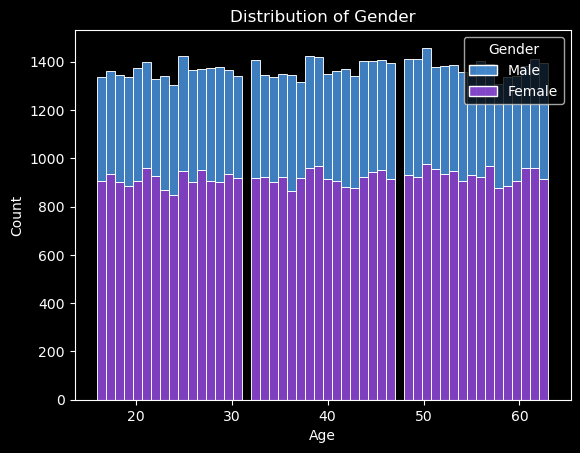

In [25]:
plt.style.use('dark_background')
sns.histplot(x = 'Age', hue = 'Gender', multiple = 'stack', bins = 50, data = df2, palette = 'cool')
plt.title('Distribution of Gender')
plt.xlabel('Age')
plt.ylabel('Count')

### Query for payment method distribution & plotting line and pie chart

In [26]:
Query3 = '''select Pay_Method, sum(Purchase_VALUE) as Purchase_Value
          from online_shop
          group by Pay_Method
          order by Purchase_Value desc'''
df3 = pd.read_sql_query(Query3, con=cursor)
df3

,Pay_Method,Purchase_Value
0,Card,316625.048
1,Digital Wallets,303699.363
2,PayPal,232315.015
3,Other,198037.096


In [27]:
df3.iplot(x='Pay_Method', y='Purchase_Value', xTitle='Payment Mode', yTitle='Payment Values', title="Purchase Value by Payment Method")

In [28]:
fig = px.pie(df3, values='Purchase_Value', names='Pay_Method', title='Payment Method Distribution')
fig.show()

### Query for Browser Users and a pie chart visual

In [29]:
Query4 = '''select Browser, count(*) as Customers
          from online_shop
          group by Browser
          order by Customers desc'''
df4 = pd.read_sql_query(Query4, con=cursor)
df4

,Browser,Customers
0,Chrome,42076
1,Safari,13135
2,Other,7208
3,Edge,3377


In [30]:
fig = px.pie(df4, values='Customers', names='Browser', title='Browser Users')
fig.show()

### Query for Gender Distribution in terms of all set also plotting a bar graph

In [31]:
Query5 = '''select
          Gender,
          sum(Time_Spent) as spent_time,
          sum(Purchase_VALUE) as money_spent,
          sum(N_Purchases) as quantity,
          count(case when Newsletter = 'Subscribed' then 1 else 0 end) as count_news_subs,
          count(case when Voucher = 'Used' then 1 else 0 end) as count_used_voucher,
          sum(Revenue_Total) as total_revenue
          from online_shop
          group by Gender'''
df5 = pd.read_sql_query(Query5, con=cursor)
df5

,Gender,spent_time,money_spent,quantity,count_news_subs,count_used_voucher,total_revenue
0,Female,26469437,704348.910,176447,44172,44172,1224554.7
1,Male,12937472,346327.612,86242,21624,21624,600161.5


In [32]:
df5.iplot(x='Gender', y='money_spent', kind='bar', xTitle='Gender', yTitle='Money')

### Query for total revenue for gender and a bar graph

In [33]:
Query6 = '''select
          Gender,
          avg(Revenue_Total) as total_revenue
          from online_shop
          group by Gender'''
df6 = pd.read_sql_query(Query6, con=cursor)
df6

,Gender,total_revenue
0,Female,27.722419
1,Male,27.754416


<Axes: xlabel='Gender', ylabel='total_revenue'>

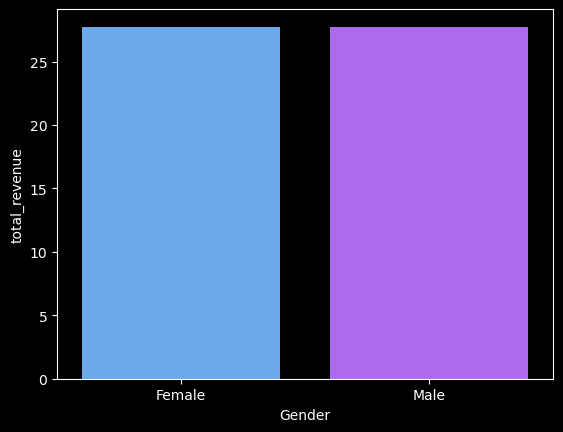

In [34]:
sns.barplot(x = 'Gender', y = 'total_revenue', data = df6, palette = 'cool')

### Query for Newsletter Distribution and a pie chart

In [35]:
Query7 = '''select
          Newsletter,
          count(Newsletter) as newsletter_count
          from online_shop
          group by Newsletter'''
df7 = pd.read_sql_query(Query7, con=cursor)
df7

,Newsletter,newsletter_count
0,Not Subscribed,55859
1,Subscribed,9937


In [36]:
fig = px.pie(df7, values='newsletter_count', names='Newsletter', title='Newsletter Distribution')
fig.show()

### Query for Vouchar Distribution and a pie chart 

In [37]:
Query8 = '''select
          Voucher,
          count(Voucher) as voucher_count
          from online_shop
          group by Voucher'''
df8 = pd.read_sql_query(Query8, con=cursor)
df8

,Voucher,voucher_count
0,Not Used,49330
1,Used,16466


In [38]:
fig = px.pie(df8, values='voucher_count', names='Voucher', title='Vouchar Distribution')
fig.show()

### Query for time spent in browser and a bar graph

In [39]:
Query9 = '''select
          Browser,
          sum(Time_Spent) as Time_Spent
          from online_shop
          group by Browser'''
df9 = pd.read_sql_query(Query9, con=cursor)
df9

,Browser,Time_Spent
0,Chrome,25167822
1,Edge,2026815
2,Other,4317754
3,Safari,7894518


Text(0.5, 1.0, 'Time Spent by Browser (in seconds)')

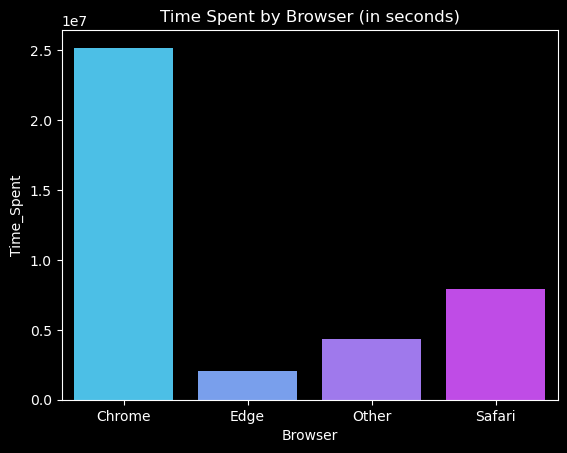

In [40]:
sns.barplot(x = 'Browser', y = 'Time_Spent', data = df9, palette = 'cool')
plt.title('Time Spent by Browser (in seconds)')

### Query for Purchase Value by Month and a line chart

In [41]:
Query10 = '''select
          Month,
          sum(Purchase_VALUE) as Purchase_Value
          from online_shop
          group by Month'''
df10 = pd.read_sql_query(Query10, con=cursor)
df10

,Month,Purchase_Value
0,1,91251.475
1,2,79370.862
2,3,88831.079
3,4,85977.834
4,5,89032.126
5,6,86601.109
6,7,87029.272
7,8,88841.632
8,9,87013.031
9,10,90410.203


Text(0.5, 1.0, 'Purchase Value by Month')

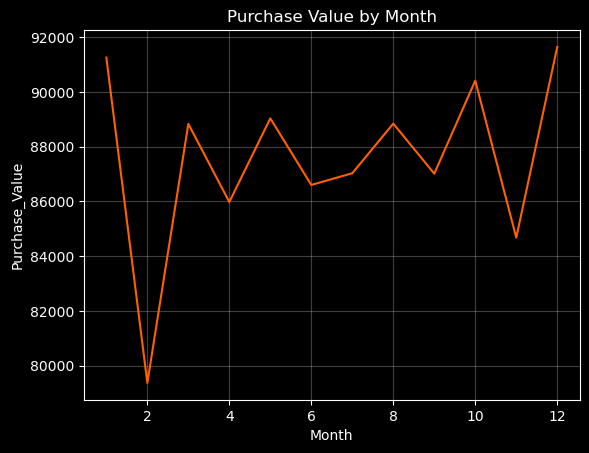

In [42]:
plt.style.use('dark_background')
plt.plot(df10['Month'], df10['Purchase_Value'], color='#FF6000')
plt.grid(color = 'lightgray', alpha = 0.3)
plt.xlabel('Month')
plt.ylabel('Purchase_Value')
plt.title('Purchase Value by Month')

### Query for Total Revenue by Month and a line chart

In [43]:
Query11 = '''select
          Month,
          sum(Revenue_Total) as Revenue_Total
          from online_shop
          group by Month'''
df11 = pd.read_sql_query(Query11, con=cursor)
df11

,Month,Revenue_Total
0,1,159971.4
1,2,138002.9
2,3,153033.8
3,4,150651.5
4,5,154229.4
5,6,149994.9
6,7,151661.3
7,8,154860.3
8,9,151553.3
9,10,155362.4


Text(0.5, 1.0, 'Total Revenue by Month')

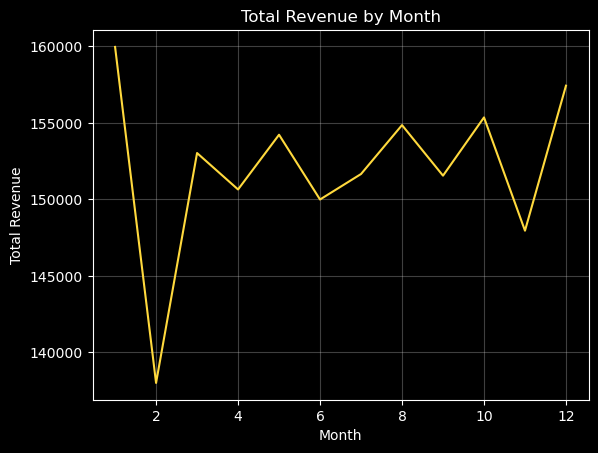

In [44]:
plt.style.use('dark_background')
plt.plot(df11['Month'], df11['Revenue_Total'], color='#FFD93D')
plt.grid(color = 'lightgray', alpha = 0.3)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')

### ### Query for time Spent by Month and a line chart

In [45]:
Query12 = '''select
          Month,
          sum(Time_Spent) as Time_Spent
          from online_shop
          group by Month'''
df12 = pd.read_sql_query(Query12, con=cursor)
df12

,Month,Time_Spent
0,1,3442048
1,2,2977284
2,3,3250744
3,4,3220590
4,5,3339587
5,6,3263454
6,7,3233088
7,8,3377749
8,9,3293215
9,10,3361863


Text(0.5, 1.0, 'Time Spent by Month')

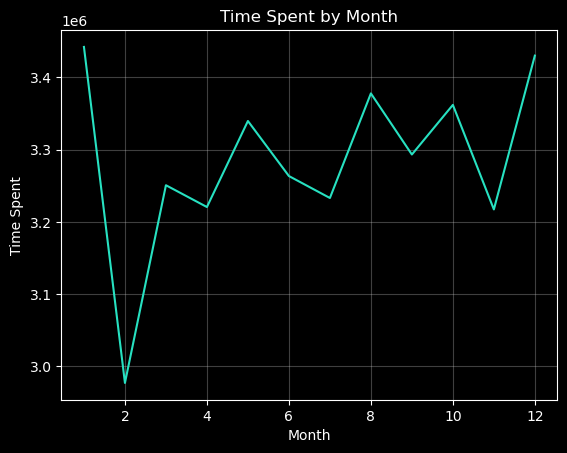

In [46]:
plt.style.use('dark_background')
plt.plot(df12['Month'], df12['Time_Spent'], color='#27E1C1')
plt.grid(color = 'lightgray', alpha = 0.3)
plt.xlabel('Month')
plt.ylabel('Time Spent')
plt.title('Time Spent by Month')